# Machine learning: modelos lineares

Esse mini-projeto possui fins exploratórios envolvendo as principais métricas usadas em regressão. Trata-se de uma previsão de peso `'Weight'` com base na altura `'Height'`.

### Algoritmos de regressão linear estudados

1. Linear Regression
2. Ridge regression
3. Lasso
4. ElasticNet
5. SVM (Support Vector Machine)

### Métricas estudadas

1. R² (Coeficiente de Determinação)



<div style="text-align: center; font-size: 15px;">
    $R^2 = 1 - \frac{SSE}{SSTO}$
</div>


2. MSE (Erro Médio Quadrático)

<div style="text-align: center; font-size: 15px;">
    $MSE = \frac{1}{n} \sum_{i=1}^n (y_i - {ŷ})^2$
</div>


3. RMSE (Raiz Quadrada do Erro Médio Quadrático)

<div style="text-align: center; font-size: 15px;">
    $RMSE = \sqrt{MSE}$
</div>

4. RMSPE (Raiz Quadrada do Erro Médio Percentual ao Quadrado)

<div style="text-align: center; font-size: 15px;">
    $RMSPE = \sqrt{\frac{\sum_{i=1}^n \left(\frac{y_i - \bar{y}}{y_i}\right)^2}{n}}$
</div>

5. MAE (Erro Absoluto Médio)

<div style="text-align: center; font-size: 15px;">
    $MAE = \frac{1}{n} \sum_{i=1}^n |y_i - \bar{y}|$
</div>

6. MAPE (Erro Percentual Absoluto Médio)

<div style="text-align: center; font-size: 15px;">
    $MAPE = \frac{1}{n} \sum_{i=1}^n \left(\frac{|y_i - \bar{y}|}{y_i}\right) \times 100$
</div>

7. ME (Erro médio)
<div style="text-align: center; font-size: 15px;">
    $ME = \frac{\sum_{i=1}^n (y_i - \bar{y})}{n}$
</div>

8. MAD (Desvio Absoluto Médio)

<div style="text-align: center; font-size: 15px;">
    $MAD = \frac{1}{n} \sum_{i=1}^n |y_i - \bar{y}|$
</div>

# Bibliotecas/Frameworks

In [1]:
# gerais

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# algoritmos de ml

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.svm import SVR

# métricas

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

# Funções auxiliares

In [2]:
def ml_error(model_name, y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmspe = np.sqrt(mean_squared_error(y_test, y_pred)) / np.mean(y_test)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    me = np.mean(y_pred - y_test)
    mad = np.mean(np.abs(y_pred - y_test))
    
    return pd.DataFrame([{'Model': model_name, 'R²': r2, 'MSE': mse, 'RMSE': rmse, 'RMSPE': rmspe,
                          'MAE': mae, 'MAPE': mape, 'ME': me, 'MAD': mad}], index=[0])

# Importando os dados

In [3]:
df = pd.read_csv('data/linear-regression.csv',index_col=0)

In [4]:
df

,Height(Inches),Weight(Pounds)
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971
...,...,...
24996,69.50215,118.0312
24997,64.54826,120.1932
24998,64.69855,118.2655


# Inspecionando os dados

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 1 to 25000
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height(Inches)  25000 non-null  float64
 1   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2)
memory usage: 585.9 KB


In [6]:
df.describe()

,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


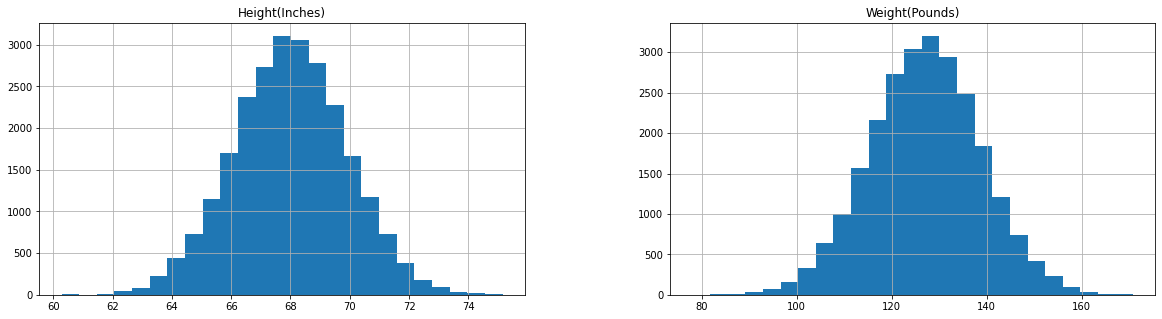

In [7]:
df.hist(figsize=(20, 5), bins=25);

<AxesSubplot: xlabel='Height(Inches)', ylabel='Weight(Pounds)'>

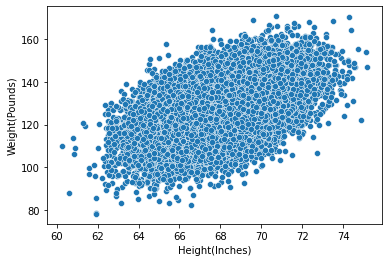

In [8]:
sns.scatterplot(data=df, x='Height(Inches)', y='Weight(Pounds)')

<AxesSubplot: >

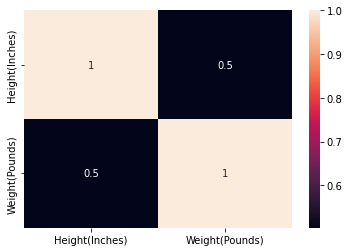

In [9]:
sns.heatmap(df.corr(), annot=True)

# Convertendo unidades dos dados

In [10]:
df.columns

Index(['Height(Inches)', 'Weight(Pounds)'], dtype='object')

In [11]:
# Height: in -> cm = 2.54

df['Height(Centimeters)'] = df['Height(Inches)'].apply(lambda x: x * 2.54)

In [12]:
# Weight: lb -> kg = 0.45

df['Weight(Kg)'] = df['Weight(Pounds)'].apply(lambda x: x * 0.45)

In [13]:
df = df.drop(['Height(Inches)', 'Weight(Pounds)'], axis=1)

In [14]:
df

,Height(Centimeters),Weight(Kg)
Index,,
1,167.089607,50.846625
2,181.648633,61.419285
3,176.272800,68.862105
4,173.270164,64.050930
5,172.181037,64.933695
...,...,...
24996,176.535461,53.114040
24997,163.952580,54.086940
24998,164.334317,53.219475


# Split do dataset em treino e teste

In [15]:
X = df['Height(Centimeters)']
y = df['Weight(Kg)']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
display(X_train)
display(y_train)
display(X_test)
display(y_test)

Index
23312    172.590384
23624    169.048684
1021     177.932385
12646    173.940876
1534     167.924683
            ...    
21576    171.421425
5391     169.990186
861      173.719414
15796    176.014659
23655    170.505222
Name: Height(Centimeters), Length: 20000, dtype: float64

Index
23312    49.803570
23624    57.153105
1021     63.103410
12646    59.877495
1534     51.952185
           ...    
21576    50.185890
5391     55.549395
861      54.441405
15796    61.041060
23655    55.252170
Name: Weight(Kg), Length: 20000, dtype: float64

Index
6869     173.798154
24017    172.457440
9669     171.854419
13641    175.292995
14019    175.286797
            ...    
8671     175.098126
11840    170.903621
4014     174.170289
21148    170.422875
696      179.247267
Name: Height(Centimeters), Length: 5000, dtype: float64

Index
6869     60.428475
24017    50.384970
9669     61.194195
13641    56.871090
14019    45.081450
           ...    
8671     62.142345
11840    47.344545
4014     63.533655
21148    58.286745
696      60.638715
Name: Weight(Kg), Length: 5000, dtype: float64

In [18]:
# reshape

In [19]:
X_train = X_train.values.reshape(-1,1)

In [20]:
X_test = X_test.values.reshape(-1,1)

# Algoritmos de regressão linear

### LinearRegression

In [50]:
lr = LinearRegression()

# treino

lr.fit(X_train, y_train)


# previsão

y_pred_lr = lr.predict(X_test)


# performance

lr_result = ml_error('Linear Regression', y_test, y_pred_lr)
lr_result

,Model,R²,MSE,RMSE,RMSPE,MAE,MAPE,ME,MAD
0,Linear Regression,0.260591,20.753802,4.555634,0.079661,3.615646,6.444817,0.016262,3.615646


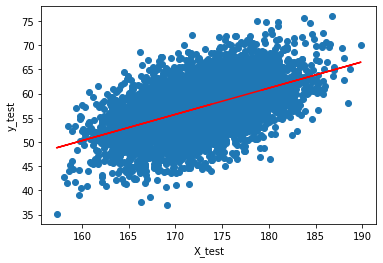

In [61]:
a = lr.coef_
b = lr.intercept_

plt.plot(X_test, y_test, marker='o', ls='')
plt.plot(X_test, a*X_test + b, c='r')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.show()

Text(0, 0.5, 'Valores previstos')

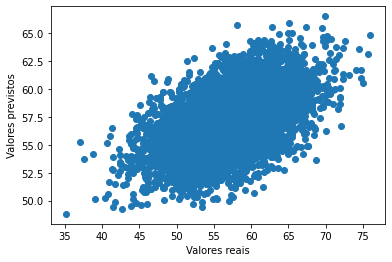

In [62]:
plt.scatter(y_test, y_pred_lr)


# rótulos dos eixos

plt.xlabel('Valores reais')
plt.ylabel('Valores previstos')

### Ridge regression

In [22]:
rr = Ridge(alpha=2)

# treino

rr.fit(X_train, y_train)

# previsão

y_pred_rr = rr.predict(X_test)


# performance

rr_result = ml_error('Ridge Regression', y_test, y_pred_rr)
rr_result

,Model,R²,MSE,RMSE,RMSPE,MAE,MAPE,ME,MAD
0,Ridge Regression,0.260591,20.753803,4.555634,0.079661,3.615646,6.444817,0.016261,3.615646


### Lasso

In [23]:
lrr = Lasso(alpha=0.01)

# treino

lrr.fit(X_train, y_train)

# previsão

y_pred_lrr = lrr.predict(X_test)


# performance

lrr_result = ml_error('Lasso', y_test, y_pred_lrr)
lrr_result

,Model,R²,MSE,RMSE,RMSPE,MAE,MAPE,ME,MAD
0,Lasso,0.260583,20.754024,4.555658,0.079661,3.615629,6.444822,0.016246,3.615629


### ElasticNet

In [27]:
en = ElasticNet()

# treino

en.fit(X_train, y_train)

# previsão

y_pred_en = en.predict(X_test)


# performance

en_result = ml_error('ElasticNet', y_test, y_pred_en)
en_result

,Model,R²,MSE,RMSE,RMSPE,MAE,MAPE,ME,MAD
0,ElasticNet,0.259108,20.795442,4.560202,0.07974,3.617083,6.449784,0.015117,3.617083


### SVM

In [25]:
svm = SVR(kernel='linear')

# treino

svm.fit(X_train, y_train)

# previsão

y_pred_svm = svm.predict(X_test)

# performance

svm_result = ml_error('SVM', y_test, y_pred_svm)
svm_result

,Model,R²,MSE,RMSE,RMSPE,MAE,MAPE,ME,MAD
0,SVM,0.260503,20.756277,4.555906,0.079665,3.615386,6.443024,0.001224,3.615386
